In [1]:
import pandas as pd

In [2]:
!wget https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
!unzip ml-latest-small.zip

--2024-08-04 07:12:33--  https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K  4.05MB/s    in 0.2s    

2024-08-04 07:12:33 (4.05 MB/s) - ‘ml-latest-small.zip’ saved [978202/978202]

Archive:  ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


In [3]:
#load datasets
ratings = pd.read_csv('ml-latest-small/ratings.csv')
movies = pd.read_csv('ml-latest-small/movies.csv')

In [4]:
data = pd.merge(ratings, movies, on='movieId')

In [5]:
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [6]:
!pip install scikit-surprise


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357244 sha256=8cf5d192aad53216e4a18b618c6e220c2b9e8badd866cf32498dfc87af497de4
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [7]:
from sklearn.model_selection import train_test_split
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import train_test_split as surprise_train_test_split


In [8]:
data.tail()

,userId,movieId,rating,timestamp,title,genres
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller
100835,610,163981,3.5,1493850155,31 (2016),Horror


In [9]:
reader = Reader(rating_scale=(0.5, 5.0))


In [10]:
#dataset load to the Surprise format
surprise_data = Dataset.load_from_df(data[['userId', 'movieId', 'rating']], reader)


In [11]:
#split dataset
trainset, testset = surprise_train_test_split(surprise_data, test_size=0.2)

In [12]:
#By using SVD
model = SVD()

In [13]:
#train the model
model.fit(trainset)

In [14]:
#predict ratings
predictions = model.test(testset)

In [15]:
#calculate Root Mean Squared Error
rmse = accuracy.rmse(predictions)
print(f"RMSE: {rmse}")

RMSE: 0.8738
RMSE: 0.8738426104336198


In [16]:
def get_movie_recommendations(user_id, model, movies_df, num_recommendations=10):
    # Get a list
    all_movie_ids = movies_df['movieId'].unique()

In [17]:
import pandas as pd
from surprise import Reader, Dataset, SVD
from surprise.model_selection import train_test_split


In [18]:
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)


In [19]:
trainset, testset = train_test_split(data, test_size=0.25)

In [20]:
model = SVD()
model.fit(trainset)

In [24]:
def get_movie_recommendations(user_id, model, movies_df, num_recommendations=10):
    # Get a list of all movie IDs
    all_movie_ids = movies_df['movieId'].unique()

    # Predict ratings for all movies for the given user
    user_ratings = [model.predict(user_id, movie_id) for movie_id in all_movie_ids]

    # Sort predictions by estimated rating
    user_ratings.sort(key=lambda x: x.est, reverse=True)

    # Get top N recommendations
    top_recommendations = user_ratings[:num_recommendations]

    # Get movie titles for the top recommendations
    recommended_movie_ids = [rec.iid for rec in top_recommendations]
    recommended_movies = movies_df[movies_df['movieId'].isin(recommended_movie_ids)]

    return recommended_movies


In [25]:
user_id = 1
recommendations = get_movie_recommendations(user_id, model, movies)
print(recommendations)

     movieId                                              title  \
224      260          Star Wars: Episode IV - A New Hope (1977)   
277      318                   Shawshank Redemption, The (1994)   
613      778                               Trainspotting (1996)   
694      912                                  Casablanca (1942)   
820     1080                Monty Python's Life of Brian (1979)   
863     1136             Monty Python and the Holy Grail (1975)   
896     1193             One Flew Over the Cuckoo's Nest (1975)   
900     1198  Raiders of the Lost Ark (Indiana Jones and the...   
906     1204                          Lawrence of Arabia (1962)   
911     1210  Star Wars: Episode VI - Return of the Jedi (1983)   

                       genres  
224   Action|Adventure|Sci-Fi  
277               Crime|Drama  
613        Comedy|Crime|Drama  
694             Drama|Romance  
820                    Comedy  
863  Adventure|Comedy|Fantasy  
896                     Drama  
900   

In [26]:
from surprise import accuracy
from surprise.model_selection import train_test_split

In [27]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)


In [28]:
trainset, testset = train_test_split(data, test_size=0.25)


In [29]:
model = SVD()
model.fit(trainset)

In [30]:
predictions = model.test(testset)


In [31]:
#calculate RMSE and MAE
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

RMSE: 0.8754
MAE:  0.6729


In [32]:
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 0.8753751985170056
MAE: 0.6729491549128104


**Sanity Check and Top-N recommendations**

In [33]:
#sample ratings data
ratings_dict = {
    "userId": [1, 1, 1, 2, 2, 3, 3, 3, 4, 4],
    "movieId": [101, 102, 103, 101, 104, 101, 105, 106, 102, 103],
    "rating": [4, 5, 3, 2, 4, 5, 3, 4, 2, 4]
}

In [34]:
ratings = pd.DataFrame(ratings_dict)

In [35]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)


In [37]:
trainset, testset = train_test_split(data, test_size=0.25)

In [38]:
model = SVD()
model.fit(trainset)

In [39]:
predictions = model.test(testset)

In [40]:
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 1.1941
MAE:  0.8904
RMSE: 1.1940724355355115
MAE: 0.8904440729252056


In [41]:
#To get top N Recommendation
def get_top_n_recommendations(model, user_id, all_movie_ids, n=10):
    user_ratings = [model.predict(user_id, movie_id) for movie_id in all_movie_ids]
    user_ratings.sort(key=lambda x: x.est, reverse=True)
    top_n = user_ratings[:n]
    return [(rating.iid, rating.est) for rating in top_n]

In [42]:
#Get all unique values
all_movie_ids = ratings['movieId'].unique()

In [43]:
top_5_recommendations_user1 = get_top_n_recommendations(model, 1, all_movie_ids, n=5)
print("Top-5 recommendations for user 1:", top_5_recommendations_user1)


Top-5 recommendations for user 1: [(102, 4.1306663597463915), (101, 3.8016098693514286), (104, 3.7848155863430475), (106, 3.7848155863430475), (105, 3.71998685178274)]


In [44]:
for user_id in [1, 2, 3]:
    top_n_recommendations = get_top_n_recommendations(model, user_id, all_movie_ids, n=5)
    print(f"Top-5 recommendations for user {user_id}:", top_n_recommendations)


Top-5 recommendations for user 1: [(102, 4.1306663597463915), (101, 3.8016098693514286), (104, 3.7848155863430475), (106, 3.7848155863430475), (105, 3.71998685178274)]
Top-5 recommendations for user 2: [(102, 3.7828534829165097), (104, 3.5750854955994993), (106, 3.5750854955994993), (105, 3.559552692103294), (103, 3.4757176518807693)]
Top-5 recommendations for user 3: [(101, 3.922605754007077), (104, 3.763830694957114), (106, 3.763830694957114), (103, 3.69919650605768), (102, 3.692191774435689)]


**Precision and Recall**

In [45]:
from collections import defaultdict

In [46]:
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    """Return precision and recall at k metrics for each user"""
    # First map the predictions
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        # Sort user ratings
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        #precision
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1

      #Recall
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

In [47]:
precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=3.5)

In [48]:
#Print this values
print(f'Precision: {sum(precisions.values()) / len(precisions):.2f}')
print(f'Recall: {sum(recalls.values()) / len(recalls):.2f}')

Precision: 0.67
Recall: 1.00


**Analysis Report**

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import train_test_split

In [51]:
ratings_dict = {
    "userId": [1, 1, 1, 2, 2, 3, 3, 3, 4, 4],
    "movieId": [101, 102, 103, 101, 104, 101, 105, 106, 102, 103],
    "rating": [4, 5, 3, 2, 4, 5, 3, 4, 2, 4]
}
ratings = pd.DataFrame(ratings_dict)

In [52]:
#load the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)


In [53]:
trainset, testset = train_test_split(data, test_size=0.25)


In [54]:
testset

[(1, 103, 3.0), (3, 101, 5.0), (1, 102, 5.0)]

In [55]:
model = SVD()
model.fit(trainset)

In [56]:
predictions = model.test(testset)

In [57]:
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

RMSE: 1.4243
MAE:  1.2545


In [58]:
def get_top_n_recommendations(model, user_id, all_movie_ids, n=10):
    user_ratings = [model.predict(user_id, movie_id) for movie_id in all_movie_ids]
    user_ratings.sort(key=lambda x: x.est, reverse=True)
    top_n = user_ratings[:n]
    return [(rating.iid, rating.est) for rating in top_n]


In [59]:
all_movie_ids = ratings['movieId'].unique()


In [60]:
top_5_recommendations_user1 = get_top_n_recommendations(model, 1, all_movie_ids, n=5)


In [61]:
#calculate precision and recall
def precision_recall_at_k(predictions, k=10, threshold=3.5):
    user_est_true = defaultdict(list)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold)) for (est, true_r) in user_ratings[:k])
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 1
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 1

    return precisions, recalls

In [62]:
precisions, recalls = precision_recall_at_k(predictions, k=5, threshold=3.5)

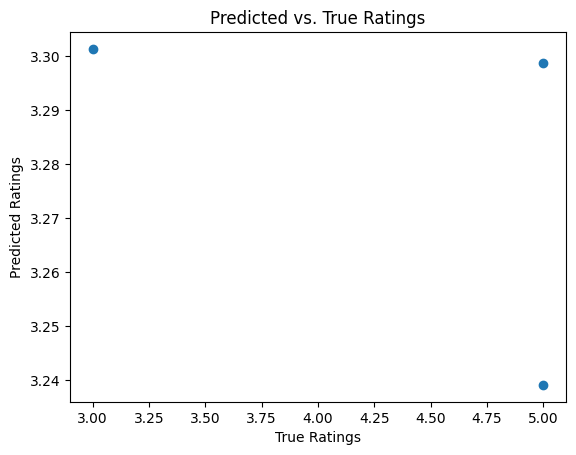

In [66]:
true_ratings = [pred.r_ui for pred in predictions]
pred_ratings = [pred.est for pred in predictions]

plt.scatter(true_ratings, pred_ratings)
plt.xlabel('True Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Predicted vs. True Ratings')
plt.show()